In [164]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [165]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/rocole-a-robusta-coffee-leaf-images-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Welder\.cache\kagglehub\datasets\nirmalsankalana\rocole-a-robusta-coffee-leaf-images-dataset\versions\1


In [166]:
images = tf.keras.utils.image_dataset_from_directory(path, image_size = (224,224),batch_size = 32)

Found 1560 files belonging to 3 classes.


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train_full = np.concatenate([x.numpy() for x, y in images])
y_train_full = np.concatenate([y.numpy() for x, y in images])

In [169]:
mask = y_train_full == 0
count_0 = len(y_train_full[mask])
mask = y_train_full == 1
count_1 = len(y_train_full[mask])
mask = y_train_full == 2
count_2 = len(y_train_full[mask])
count_0,count_1,count_2

(791, 167, 602)

In [170]:
from sklearn.utils import shuffle

X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=42)

In [171]:
X_train = X_train_full[:1248]
y_train = y_train_full[:1248]

X_test = X_train_full[1248:]
y_test = y_train_full[1248:]

In [172]:
X_valid = X_train[:250]
y_valid = y_train[:250]

In [173]:
X_train = X_train[250:]
y_train = y_train[250:]

In [174]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weight = dict(zip(classes, weights))
print(class_weight)

{np.int32(0): np.float64(0.6484730344379467), np.int32(1): np.float64(3.261437908496732), np.int32(2): np.float64(0.8685813751087903)}


In [175]:
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [176]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [177]:
history = model.fit(X_train, y_train,validation_data=(X_valid, y_valid),epochs=10,class_weight = class_weight)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 991ms/step - accuracy: 0.3697 - loss: 5.5087 - val_accuracy: 0.4960 - val_loss: 1.2739
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 845ms/step - accuracy: 0.3086 - loss: 3.4760 - val_accuracy: 0.3680 - val_loss: 1.1079
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 851ms/step - accuracy: 0.3086 - loss: 1.6413 - val_accuracy: 0.4960 - val_loss: 1.0857
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 846ms/step - accuracy: 0.3186 - loss: 1.1627 - val_accuracy: 0.1360 - val_loss: 1.1093
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 842ms/step - accuracy: 0.2525 - loss: 1.1522 - val_accuracy: 0.1360 - val_loss: 1.1078
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 847ms/step - accuracy: 0.1733 - loss: 1.1458 - val_accuracy: 0.1360 - val_loss: 1.1028
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 855ms/step - accuracy: 0.4319 - loss: 1.1090 - val_accuracy: 0.4960 - val_loss: 1.0983
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 889ms/step - accuracy: 0.1463 - loss: 1.1031 - val_accu

In [178]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.4719 - loss: 1.0993 - val_accuracy: 0.3680 - val_loss: 1.0045
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.4790 - loss: 1.0441 - val_accuracy: 0.3680 - val_loss: 1.0170
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.5210 - loss: 0.9952 - val_accuracy: 0.3680 - val_loss: 1.0070
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.5170 - loss: 0.9943 - val_accuracy: 0.4960 - val_loss: 1.0118
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.5070 - loss: 0.9807 - val_accuracy: 0.4960 - val_loss: 1.0553
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.4970 - loss: 0.9471 - val_accuracy: 0.4960 - val_loss: 1.0554
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.5030 - loss: 0.9213 - val_accuracy: 0.4960 - val_loss: 1.0132
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.5210 - loss: 0.9359 - val_accuracy: 0.4960 - v

In [179]:
import pandas as pd

<Axes: >

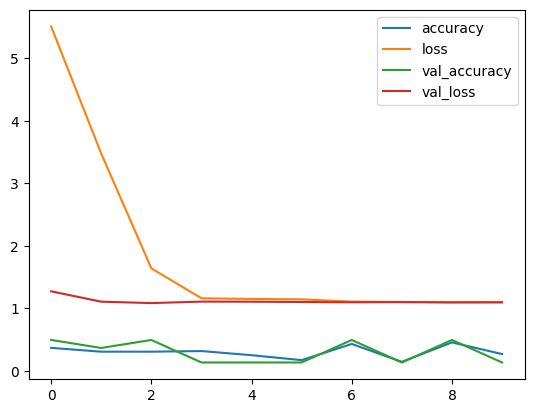

In [180]:
pd.DataFrame(history.history).plot()